# Data Fabrication

- This notebook goes through the process of fabricating data whilst collecting actual data from labs is not an optiom

## Test Database 

- Instead of trying to mimic what we might acquire from labs, we can simply create a database of fabricated data which can help us test and verify our model
    - After all, we are trying to get our model to assign an input to one of our outputs- it doesn't matter if this output is the word 'alpha' or just some gibberish, we are more interested in the fact that it can idenitfy the input belonging to the output 

### Proposal from Software meeting 25/07 

1. Using the data collected from the lab with the most samples (using old convention Lab_2), pick 26 scopes to use as our 'parents' to fabricate data from. A few more may be included for 'non words' (breath,swallow, cough etc)

2. Then, make up to 5000 variations on each parent (to mimic variability in collected data)
    - This variation can be made through mathematical manipulation of data (shift, stretch, split, remove etc)
    

3. Create a model which can learn from this and assign an input to one of these outputs

In [19]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns 
import random

# will not work until you pip3 install import-ipynb and pip3 install nbformat\n",
import import_ipynb
from format_csv import csv_format
# Set up plot specifications
sns.set(style='ticks')
sns.axes_style('white')
sns.set_context('paper')
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams.update({'font.size': 12})
rcParams['font.family'] = 'Avenir'


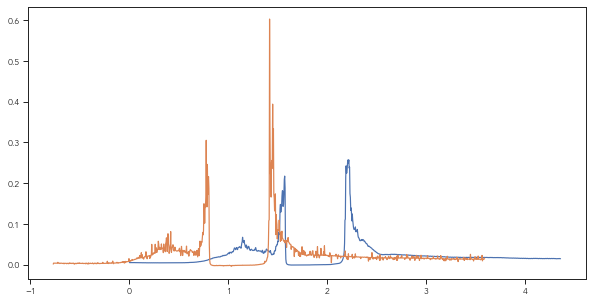

In [166]:




filename = '../fabricated_data/scope_0.csv'
df = pd.read_csv(filename)


#fig,axs = plt.subplots(2,1)



# Plot original function for comparison

plt.plot(df['Time'], df['Sensor'])

# Decide how many times the data is going to be manipulated, random for greater variability
loop = random.randint(6,9)
i =0
while i < loop:
    # Decides which method of manipulation is going to be applied
    fabrication_type = random.randint(2, 3)

    # Mirror the data (Although probsably not useful)
    if fabrication_type == 1:
        df["Sensor"] = df["Sensor"].values[::-1]


    # Scale up by a random percentage 
    elif fabrication_type == 2:
        j=0
        while j < len(df["Sensor"]):
            # Scale factor is not same each time
            scale_factor = random.randint(7,14)/10
            # Determines the spacing between elements to get scaled
            scale_element = random.randint(4,20)
            if j % scale_element == 0:
                df["Sensor"][j] *= (scale_factor)
            j+=1


    # Shift by random amount
    elif fabrication_type == 3:
        # Scale factor is not same each time
        shift_factor_x = random.randint(-50,50)/100
        shift_factor_y = random.randint(-5,10)/5000
        
        df["Time"] += (shift_factor_x)
        df["Sensor"] += (shift_factor_y)

        
    i +=1 

plt.plot(df['Time'], df['Sensor'])
